In [25]:
import pandas as pd
import numpy as np

In [26]:
df_train1 = pd.read_csv(r'C:\Users\piush\Desktop\Dataset\GrumboData\train.csv',nrows = 20000)

import pandas

df = pandas.DataFrame(data)

Randomly sample 70% of your dataframe

df_0.7 = df.sample(frac=0.7)


Randomly sample 7 elements from your dataframe

df_7 = df.sample(n=7)

For either approach above, you can get the rest of the rows by doing:

df_rest = df.loc[~df.index.isin(df_0.7.index)]

In [27]:
# Randomly sample 20% of your dataframe
df_train = df_train1.sample(frac=0.2)

In [28]:
print (df_train.dtypes)

Semana                 int64
Agencia_ID             int64
Canal_ID               int64
Ruta_SAK               int64
Cliente_ID             int64
Producto_ID            int64
Venta_uni_hoy          int64
Venta_hoy            float64
Dev_uni_proxima        int64
Dev_proxima          float64
Demanda_uni_equil      int64
dtype: object


In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 13882 to 7343
Data columns (total 11 columns):
Semana               4000 non-null int64
Agencia_ID           4000 non-null int64
Canal_ID             4000 non-null int64
Ruta_SAK             4000 non-null int64
Cliente_ID           4000 non-null int64
Producto_ID          4000 non-null int64
Venta_uni_hoy        4000 non-null int64
Venta_hoy            4000 non-null float64
Dev_uni_proxima      4000 non-null int64
Dev_proxima          4000 non-null float64
Demanda_uni_equil    4000 non-null int64
dtypes: float64(2), int64(9)
memory usage: 375.0 KB


In [30]:
#print summary of data frame
summary = df_train.describe()
print(summary)


       Semana   Agencia_ID     Canal_ID     Ruta_SAK    Cliente_ID  \
count  4000.0  4000.000000  4000.000000  4000.000000  4.000000e+03   
mean      3.0  1110.590000     3.620500  1962.721000  1.267840e+06   
std       0.0     0.491895     3.224295  1141.717438  1.547006e+06   
min       3.0  1110.000000     1.000000  1001.000000  1.407500e+04   
25%       3.0  1110.000000     1.000000  1010.000000  6.185000e+04   
50%       3.0  1111.000000     1.000000  1020.000000  8.150310e+05   
75%       3.0  1111.000000     7.000000  3309.000000  1.976955e+06   
max       3.0  1111.000000    11.000000  3504.000000  9.678222e+06   

        Producto_ID  Venta_uni_hoy    Venta_hoy  Dev_uni_proxima  Dev_proxima  \
count   4000.000000    4000.000000   4000.00000      4000.000000  4000.000000   
mean   11529.253750       9.959500    125.30507         0.307750     2.487342   
std    16049.362811      38.876712    407.81494        10.984498    55.113530   
min       73.000000       0.000000      0.000

In [31]:
df_test1 = pd.read_csv(r'C:\Users\piush\Desktop\Dataset\GrumboData\test.csv',nrows = 20000)

In [32]:
df_test = df_test1.sample(frac=0.2)

In [33]:
#frames = [df_train,df_test]
df = pd.merge(df_train,df_test,on = ['Producto_ID','Semana'],how = 'left')


In [34]:
df.head()

,Semana,Agencia_ID_x,Canal_ID_x,Ruta_SAK_x,Cliente_ID_x,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,id,Agencia_ID_y,Canal_ID_y,Ruta_SAK_y,Cliente_ID_y
0,3,1111,1,1011,2363076,1160,3,56.58,0,0.0,3,NaN,NaN,NaN,NaN,NaN
1,3,1111,1,1002,51039,46772,16,142.72,0,0.0,16,NaN,NaN,NaN,NaN,NaN
2,3,1110,7,3317,1864906,37057,10,75.00,0,0.0,10,NaN,NaN,NaN,NaN,NaN
3,3,1110,7,3315,1898574,2233,6,119.64,0,0.0,6,NaN,NaN,NaN,NaN,NaN
4,3,1111,1,1019,1289913,1182,12,167.28,0,0.0,12,NaN,NaN,NaN,NaN,NaN


In [35]:
#let us drop id,
df.drop(['id','Semana','Agencia_ID_y','Canal_ID_y','Ruta_SAK_y','Cliente_ID_y','Agencia_ID_x','Canal_ID_x','Ruta_SAK_x','Cliente_ID_x'], axis=1, inplace=True)

In [36]:
df.head()

,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,1160,3,56.58,0,0.0,3
1,46772,16,142.72,0,0.0,16
2,37057,10,75.00,0,0.0,10
3,2233,6,119.64,0,0.0,6
4,1182,12,167.28,0,0.0,12


•	Venta_uni_hoy — Sales unit this week (integer)

•	Venta_hoy — Sales this week (unit: pesos)

•	Dev_uni_proxima — Returns unit next week (integer)

•	Dev_proxima — Returns next week (unit: pesos)

•	Demanda_uni_equil — Adjusted Demand (integer) (This is the target you will predict)

•	Producto_ID — Product ID

In [37]:
#Returns object containing counts of unique values.
df['Producto_ID'].value_counts()    

1146     308
2233     302
1125     223
1109     201
1150     174
3631     173
1129     168
46772    136
1160     125
3144      93
32802     78
73        76
1182      72
48077     64
1250      60
35727     58
1240      57
693       55
2665      48
1242      46
34053     45
4910      45
30574     43
35651     39
31392     39
32393     38
1700      37
1212      36
5310      35
30571     35
        ... 
205        2
49185      2
30548      2
8863       2
5355       1
45306      1
32222      1
32952      1
1169       1
30551      1
8768       1
35924      1
47840      1
632        1
42122      1
34080      1
30568      1
34468      1
6420       1
33191      1
31192      1
35452      1
31423      1
35841      1
48417      1
31466      1
31470      1
4947       1
31513      1
36806      1
Name: Producto_ID, dtype: int64

In [38]:
len(df['Producto_ID'])

4000

In [39]:
df['Producto_ID'].nunique()

144

In [40]:
import re
# Review input features (train set) - Part 2A
missing_values = []

for column in df:
    # Find all the unique feature values
    uniq = df[column].unique()
    print ("'{}' has {} unique values" .format(column,uniq.size))
    if (uniq.size > 25):
        print("~~Listing up to 25 unique values~~")
    print (uniq[0:24])
    print ("\n-----------------------------------------------------------------------\n")
    
    # Find features with missing values
    if (True in pd.isnull(uniq)):
        s = "{} has {} missing" .format(column, pd.isnull(train_set[column]).sum())
        missing_values.append(s)
    
    
  
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print ("Features with missing values:\n{}\n\n" .format(missing_values))



'Producto_ID' has 144 unique values
~~Listing up to 25 unique values~~
[ 1160 46772 37057  2233  1182 30574  1150  1146  1212  1109   693  4280
  3144  3631 30571  1220  1125 35727  1129  1216  4910  3894 31688  2665]

-----------------------------------------------------------------------

'Venta_uni_hoy' has 92 unique values
~~Listing up to 25 unique values~~
[  3  16  10   6  12   7   9  11   2   8   1   4  30   5  65 100  20  42
  14  23  24  15  34  17]

-----------------------------------------------------------------------

'Venta_hoy' has 868 unique values
~~Listing up to 25 unique values~~
[  56.58  142.72   75.    119.64  167.28   43.75  125.64  235.29   50.28
   30.02  171.12   13.96   19.2    42.78  128.34   62.5    53.52   18.
   42.64   85.56  196.2   187.5    30.56   18.86]

-----------------------------------------------------------------------

'Dev_uni_proxima' has 19 unique values
[  0   1   3  15   5   2   4  20 152  11  48  50   9  25  12  21 672   6
   8]

-------

In [41]:
from sklearn import datasets, linear_model
from math import sqrt

### How to take column-slices of dataframe in pandas

http://stackoverflow.com/questions/10665889/how-to-take-column-slices-of-dataframe-in-pandas

#### using the column names

titanic.loc[:,['sex','age','fare']]

#### using the column indices

titanic.iloc[:,[2,3,6]]

#### using the ix

titanic.ix[:,[‘sex’,’age’,’fare’]]

###### or

titanic.ix[:,[2,3,6]]

#### using the reindex method

titanic.reindex(columns=['sex','age','fare'])

In [50]:
X = df.ix[:,['Producto_ID','Venta_uni_hoy','Venta_hoy','Dev_uni_proxima','Dev_proxima']]
Y = df.ix[:,'Demanda_uni_equil']


In [52]:

# sk learn import 
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier

#Find all features with more than 90% variance in values.
threshold = 0.90
vt = VarianceThreshold().fit(X)

# Find feature names
feat_var_threshold = df.columns[vt.variances_ > threshold * (1-threshold)]
feat_var_threshold

C:\Anaconda3\lib\site-packages\pandas\indexes\base.py:1267: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 6 but corresponding boolean dimension is 5
  result = getitem(key)


Index(['Producto_ID', 'Venta_uni_hoy', 'Venta_hoy', 'Dev_uni_proxima',
       'Dev_proxima'],
      dtype='object')

In [53]:
model = RandomForestClassifier()
model.fit(X, Y)

feature_imp = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["importance"])
feat_imp_5 = feature_imp.sort_values("importance", ascending=False).head(20).index
feat_imp_5

Index(['Venta_uni_hoy', 'Venta_hoy', 'Producto_ID', 'Dev_proxima',
       'Dev_uni_proxima'],
      dtype='object')

In [55]:
components = 5
pca = PCA(n_components=components).fit(X)

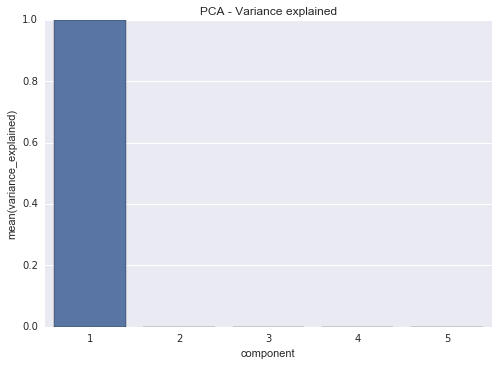

In [58]:
import seaborn as sns
#Show explained variance for each component
pca_variance_explained_df = pd.DataFrame({
    "component": np.arange(1, components+1),
    "variance_explained": pca.explained_variance_ratio_            
    })

ax = sns.barplot(x='component', y='variance_explained', data=pca_variance_explained_df)
ax.set_title("PCA - Variance explained")
plt.show()

In [69]:
seed = 7
processors=1
num_folds=3
num_instances=len(X)
scoring='accuracy'

kfold = KFold(n=num_instances, n_folds=num_folds, random_state=seed)

In [70]:
# Prepare some basic models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('K-NN', KNeighborsClassifier(n_neighbors=5)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVC', SVC(probability=True)))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring, n_jobs=processors)
    results.append(cv_results)
    names.append(name)
    print("{0}: ({1:.3f}) +/- ({2:.3f})".format(name, cv_results.mean(), cv_results.std()))

LR: (0.350) +/- (0.048)
LDA: (0.960) +/- (0.005)
K-NN: (0.666) +/- (0.009)
CART: (0.983) +/- (0.001)
NB: (0.842) +/- (0.053)


C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


In [71]:
cart = DecisionTreeClassifier()
num_trees = 100

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring, n_jobs=processors)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))

(0.980) +/- (0.004)


In [73]:
num_trees = 100
num_features = 5

model = RandomForestClassifier(n_estimators=num_trees, max_features=num_features)

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring, n_jobs=processors)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))

(0.980) +/- (0.001)


In [74]:
model = AdaBoostClassifier(n_estimators=100, random_state=seed)

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring, n_jobs=processors)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))


(0.304) +/- (0.025)


In [75]:
df_test = pd.read_csv(r'C:\Users\piush\Desktop\Dataset\GrumboData\test.csv')

In [76]:
df_test.head(2)

,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID
0,0,11,4037,1,2209,4639078,35305
1,1,11,2237,1,1226,4705135,1238


In [77]:
df_test.drop(['Semana','Agencia_ID','Canal_ID','Ruta_SAK','Cliente_ID'], axis=1, inplace=True)

In [ ]:
df_train = pd.read_csv(r'C:\Users\piush\Desktop\Dataset\GrumboData\train.csv')